# Project: Fashion Classifier

Zhaoyan Lin   
Dataset: Fashion MNIST


In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

Reference: 
Several resources on MNIST visualization.   
http://colah.github.io/posts/2014-10-Visualizing-MNIST/   
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b   

In [20]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [26]:
# image size
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
# defined labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

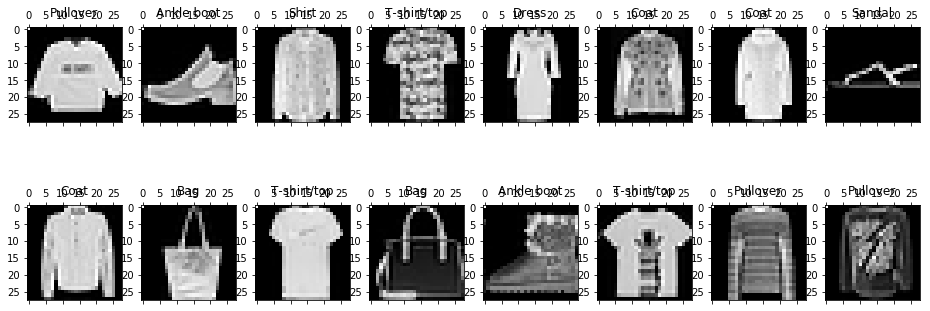

In [27]:
# Plot the graph, get a sense of how the fashion items look like
plt.gray()
fig = plt.figure( figsize=(16,6) )
feat_cols = [ 'pixel'+str(i) for i in range(784) ]
for i in range(0,16):
    ax = fig.add_subplot(2,8,i+1, title=str(labels[train.loc[i,'label']]) )
    ax.matshow(train.loc[i,feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## Using PCA

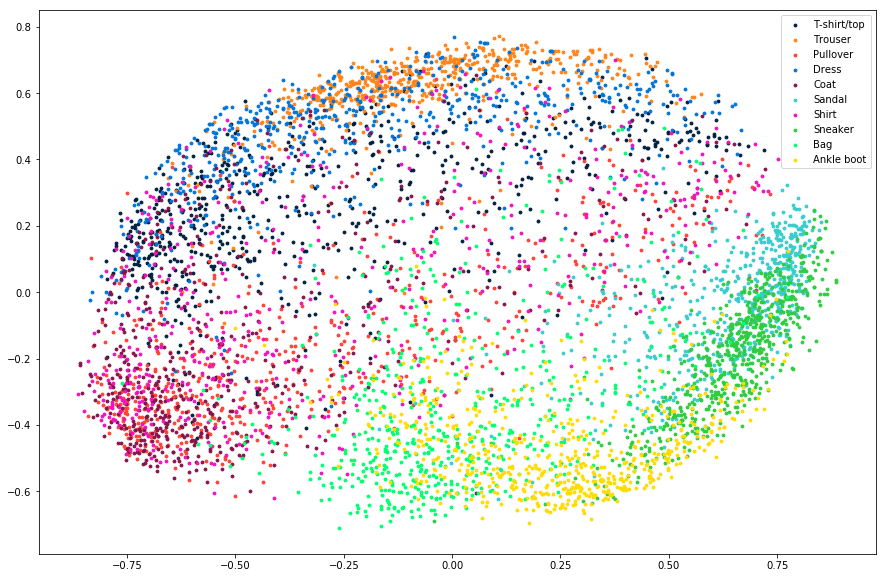

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

# Use 10% of data to visuaization
_, df_copy = train_test_split(train, test_size=0.1)
df_copy_label = df_copy.iloc[:, 0]
df_copy_images = df_copy.iloc[:, 1:]
df_copy_images_ = StandardScaler().fit_transform(df_copy_images)

# push the data to different decision boundaries
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
df_copy_images_component = PCA(n_components = 2).fit_transform(df_copy_images_)

from ast import literal_eval
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']
plt.rcParams["figure.figsize"] = [15, 10]
for k, i in enumerate(np.unique(df_copy_label)):
    plt.scatter(df_copy_images_component[df_copy_label == i, 0],
               df_copy_images_component[df_copy_label == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k], s=8)
plt.legend()
plt.show()

## Using tSNE
Reference:   
http://www.cs.toronto.edu/~hinton/absps/tsne.pdf

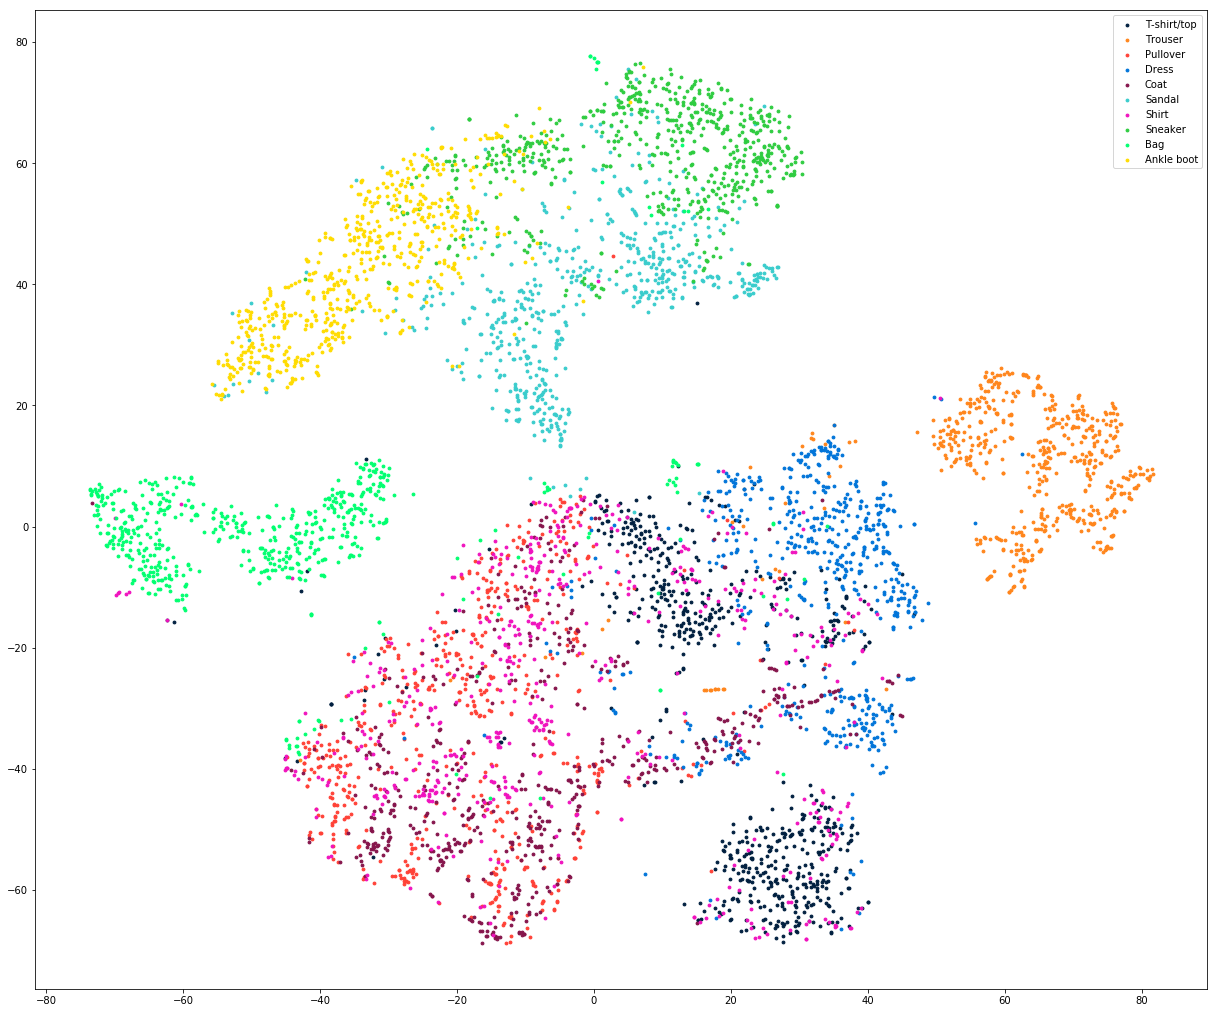

In [29]:
from sklearn.manifold import TSNE
df_copy_images_dist = TSNE(n_components = 2).fit_transform(df_copy_images)

from ast import literal_eval

plt.rcParams["figure.figsize"] = [21, 18]
for k, i in enumerate(np.unique(df_copy_label)):
    plt.scatter(df_copy_images_dist[df_copy_label == i, 0],
               df_copy_images_dist[df_copy_label == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k], s=8)
plt.legend()
plt.show()